In [127]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras import models
from keras import regularizers
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

In [128]:
DATASET_PATH = 'dataset_020/color_dataset_concat.csv'
MODEL_PATH = os.path.join('MODEL', 'color_model.keras')
SCALER_PATH = os.path.join('MODEL', 'color_scaler.pkl')

In [129]:
# Load the dataset
df = pd.read_csv(DATASET_PATH)

X = df[['R', 'G', 'B', 'W']]
y = df['control_value']

In [130]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, SCALER_PATH)

['MODEL\\color_scaler.pkl']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [91]:
inputs = layers.Input(shape=(4,))
reshaped_inputs = layers.Reshape((4, 1))(inputs)

# Architecture
# CNN branch
conv1 = layers.Conv1D(64, kernel_size=2, activation='relu')(reshaped_inputs)
conv2 = layers.Conv1D(128, kernel_size=2, activation='relu')(conv1)
flattened = layers.Flatten()(conv2)

# Fully connected branch
fc = layers.Dense(256, activation='relu')(inputs)
fc = layers.Dense(256, activation='relu')(fc)

# Combine CNN and FC branches
combined = layers.concatenate([flattened, fc])

# Final dense layers
combined = layers.Dense(512, activation='relu')(combined)
combined = layers.Dense(128, activation='relu')(combined)
combined = layers.Dense(32, activation='relu')(combined)
output = layers.Dense(1)(combined)

model =[]
# Create hybrid model
model = models.Model(inputs=inputs, outputs=output)


# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.00001), metrics=['mae', 'mse'])

In [25]:
# Create early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, verbose=1, batch_size=4, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
998/998 [==============================] - 8s 6ms/step - loss: 0.1378 - mae: 0.2939 - mse: 0.1378 - val_loss: 0.0514 - val_mae: 0.1848 - val_mse: 0.0514
Epoch 2/10
998/998 [==============================] - 6s 6ms/step - loss: 0.0408 - mae: 0.1618 - mse: 0.0408 - val_loss: 0.0306 - val_mae: 0.1338 - val_mse: 0.0306
Epoch 3/10
998/998 [==============================] - 6s 6ms/step - loss: 0.0257 - mae: 0.1174 - mse: 0.0257 - val_loss: 0.0201 - val_mae: 0.0967 - val_mse: 0.0201
Epoch 4/10
998/998 [==============================] - 6s 6ms/step - loss: 0.0175 - mae: 0.0882 - mse: 0.0175 - val_loss: 0.0143 - val_mae: 0.0773 - val_mse: 0.0143
Epoch 5/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0129 - mae: 0.0720 - mse: 0.0129 - val_loss: 0.0106 - val_mae: 0.0653 - val_mse: 0.0106
Epoch 6/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0097 - mae: 0.0606 - mse: 0.0097 - val_loss: 0.0078 - val_mae: 0.0528 - val_mse: 0.0078
Epoch 7/10
998/9

In [49]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

125/125 - 0s - loss: 0.0036 - mae: 0.0343 - mse: 0.0036 - 445ms/epoch - 4ms/step


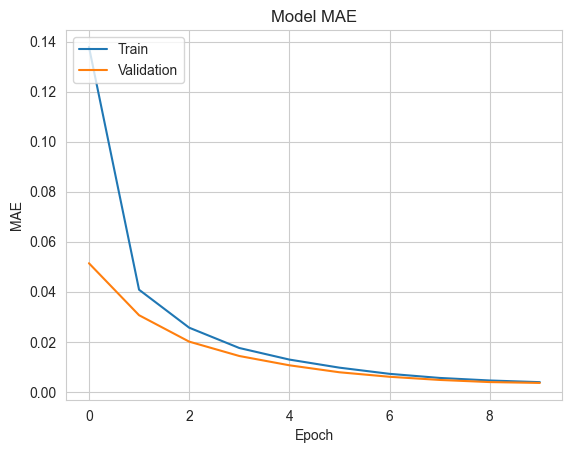

In [27]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

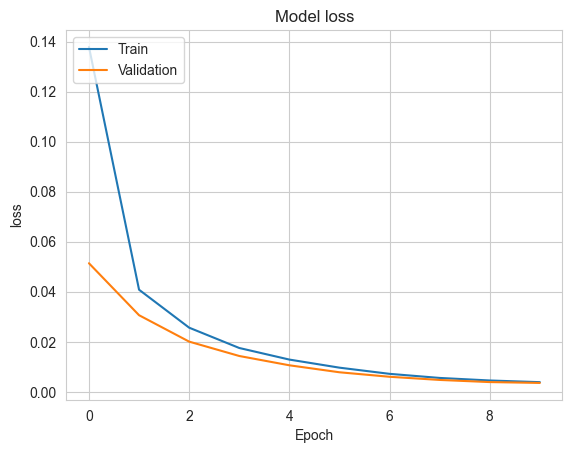

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
model.save(MODEL_PATH)

In [53]:
# Use the model for prediction
predictions = model.predict(X_test)

125/125 [==============================] - 0s 2ms/step


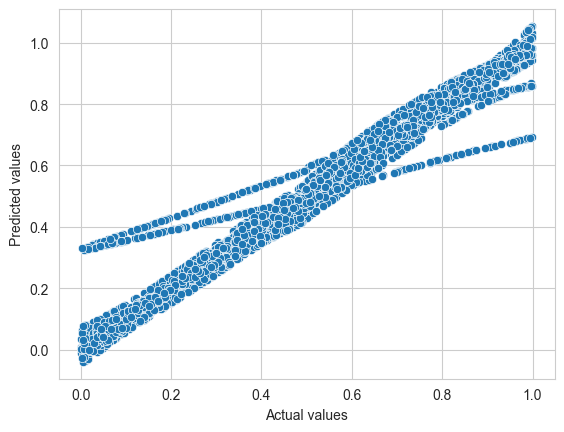

In [51]:
# Plot the predictions against the actual values
sns.scatterplot(x=y_test, y=predictions.flatten())
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [32]:
X_train.shape[1]

4

## Test Predictions on test dataset

Best Prediction Errors:
Index: 2077, Absolute Error: 8.151054382343759e-06
Index: 3465, Absolute Error: 3.9822101593034454e-05
Index: 3663, Absolute Error: 4.4821262359606706e-05
Index: 3130, Absolute Error: 5.479431152344283e-05
Index: 3070, Absolute Error: 5.7364702224727004e-05
Index: 469, Absolute Error: 6.900286674499378e-05
Index: 3043, Absolute Error: 7.783240079879683e-05
Index: 2563, Absolute Error: 8.123421669004038e-05
Index: 414, Absolute Error: 8.864063024520419e-05
Index: 317, Absolute Error: 9.511756896973811e-05

Worst Prediction Errors:
Index: 3284, Absolute Error: 0.2167076916694641
Index: 1415, Absolute Error: 0.21792458724975586
Index: 2031, Absolute Error: 0.21943916511535644
Index: 3685, Absolute Error: 0.221582439661026
Index: 503, Absolute Error: 0.22181958770751953
Index: 714, Absolute Error: 0.22194130229949952
Index: 1465, Absolute Error: 0.22381417846679688
Index: 1841, Absolute Error: 0.2239977116584778
Index: 2159, Absolute Error: 0.22403679990768433
Index

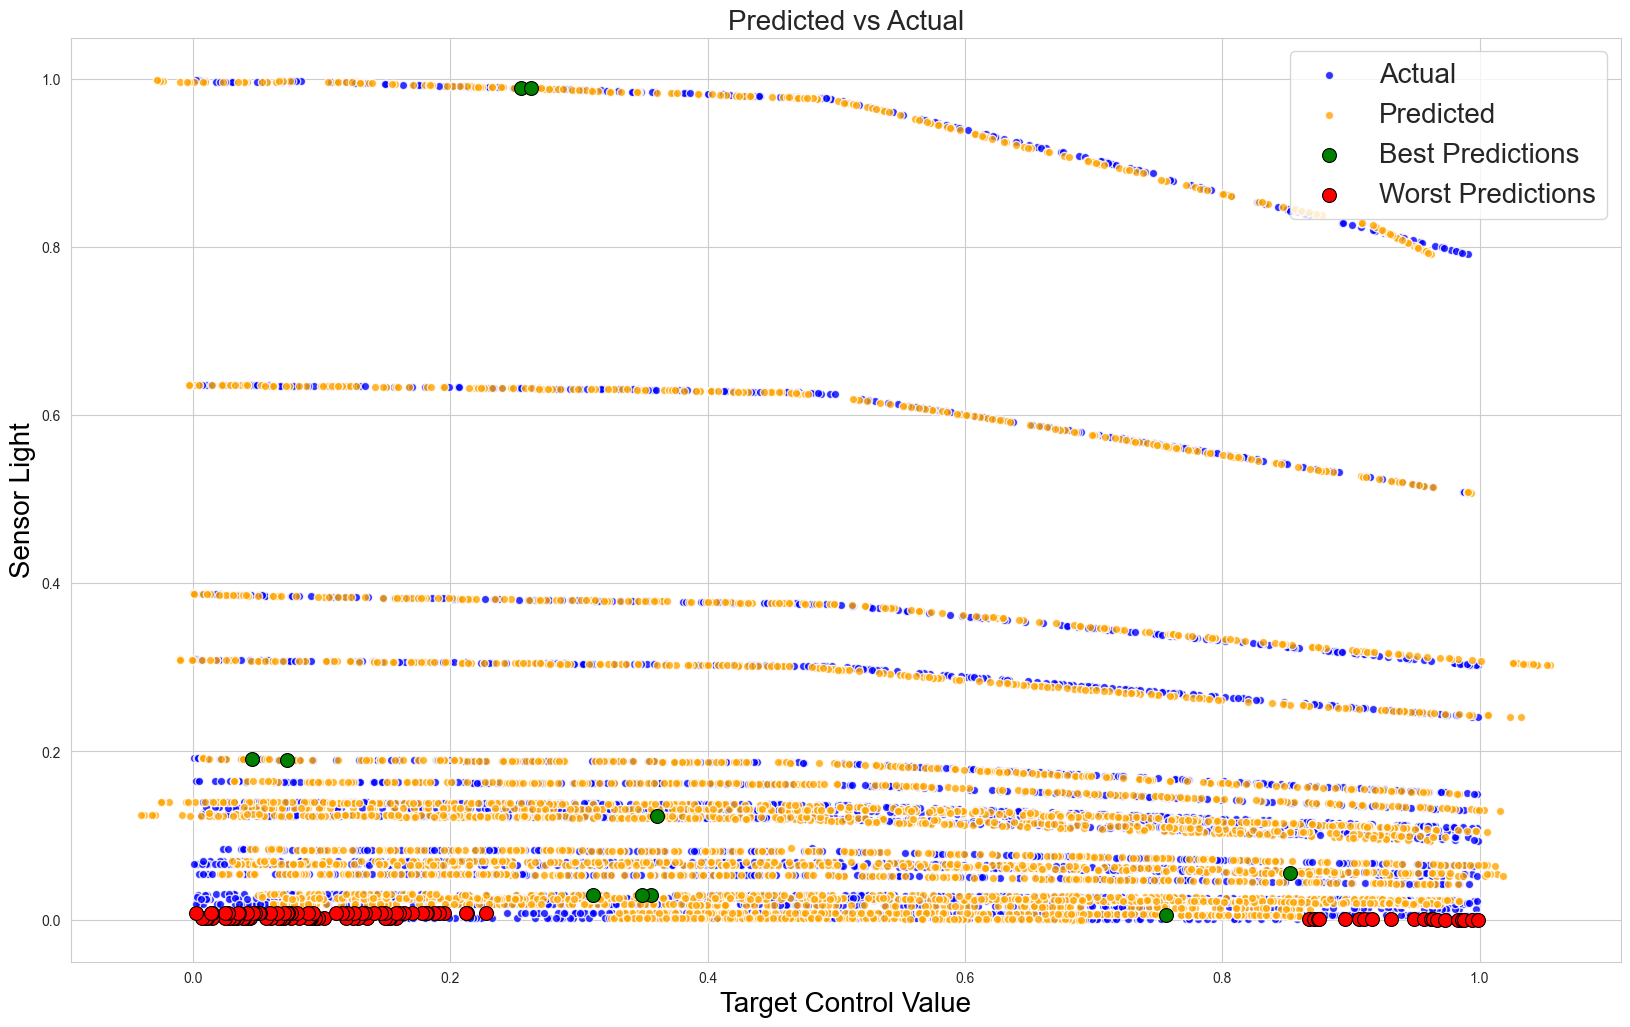

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of y_test to allow direct indexing after the train-test split
y_test = y_test.reset_index(drop=True)

# Calculate prediction errors
errors = predictions.flatten() - y_test

# Get the indices of the best and worst predictions
best_pred_indices = np.argsort(np.abs(errors))[:10]  # Indices of the 10 best predictions
worst_pred_indices = np.argsort(np.abs(errors))[-100:]  # Indices of the 10 worst predictions



absolute_errors = np.abs(errors)

best_pred_errors = absolute_errors.iloc[best_pred_indices]
worst_pred_errors = absolute_errors.iloc[worst_pred_indices]

print("Best Prediction Errors:")
for i, index in enumerate(best_pred_indices):
    print(f"Index: {index}, Absolute Error: {best_pred_errors.iloc[i]}")

print("\nWorst Prediction Errors:")
for i, index in enumerate(worst_pred_indices):
    print(f"Index: {index}, Absolute Error: {worst_pred_errors.iloc[i]}")
    



# Adjust your slicing here, if necessary
slice_min = 0
slice_max = len(y_test)  
col_slice = 0  # The feature  to plot


sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.title("Predicted vs Actual", fontsize=20)

sns.scatterplot(x=y_test[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="blue", label="Actual", linewidth=1, alpha=0.8)
sns.scatterplot(x=predictions.flatten()[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="orange", label="Predicted", linewidth=1, alpha=0.8)

# Highlight the best predictions
sns.scatterplot(x=y_test[best_pred_indices], y=X_test[best_pred_indices, col_slice], color="green", label="Best Predictions", s=100, edgecolor='black')

# Highlight the worst predictions
sns.scatterplot(x=y_test[worst_pred_indices], y=X_test[worst_pred_indices, col_slice], color="red", label="Worst Predictions", s=100, edgecolor='black')


plt.xlabel('Target Control Value', color='black', fontsize=20)
plt.ylabel('Sensor Light', color='black', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()


## Test Predictions on a new dataset

16/16 [==============================] - 0s 2ms/step
Best Prediction Errors:
Index: 373, Absolute Error: 3.2877922057084064e-07
Index: 156, Absolute Error: 2.88915634150122e-06
Index: 465, Absolute Error: 9.064912796022395e-06
Index: 131, Absolute Error: 1.2111425399807807e-05
Index: 368, Absolute Error: 1.450252532964047e-05
Index: 375, Absolute Error: 3.09224128722807e-05
Index: 412, Absolute Error: 3.901857882738103e-05
Index: 43, Absolute Error: 4.331183433531338e-05
Index: 271, Absolute Error: 7.216310501101386e-05
Index: 444, Absolute Error: 8.057951927184503e-05

Worst Prediction Errors:
Index: 420, Absolute Error: 0.00932645368576046
Index: 130, Absolute Error: 0.009344704627990752
Index: 484, Absolute Error: 0.009382715225219718
Index: 100, Absolute Error: 0.009442770481109641
Index: 231, Absolute Error: 0.009530500173568712
Index: 184, Absolute Error: 0.009585582733154352
Index: 55, Absolute Error: 0.00960937404632567
Index: 472, Absolute Error: 0.009645624399185204
Index: 28

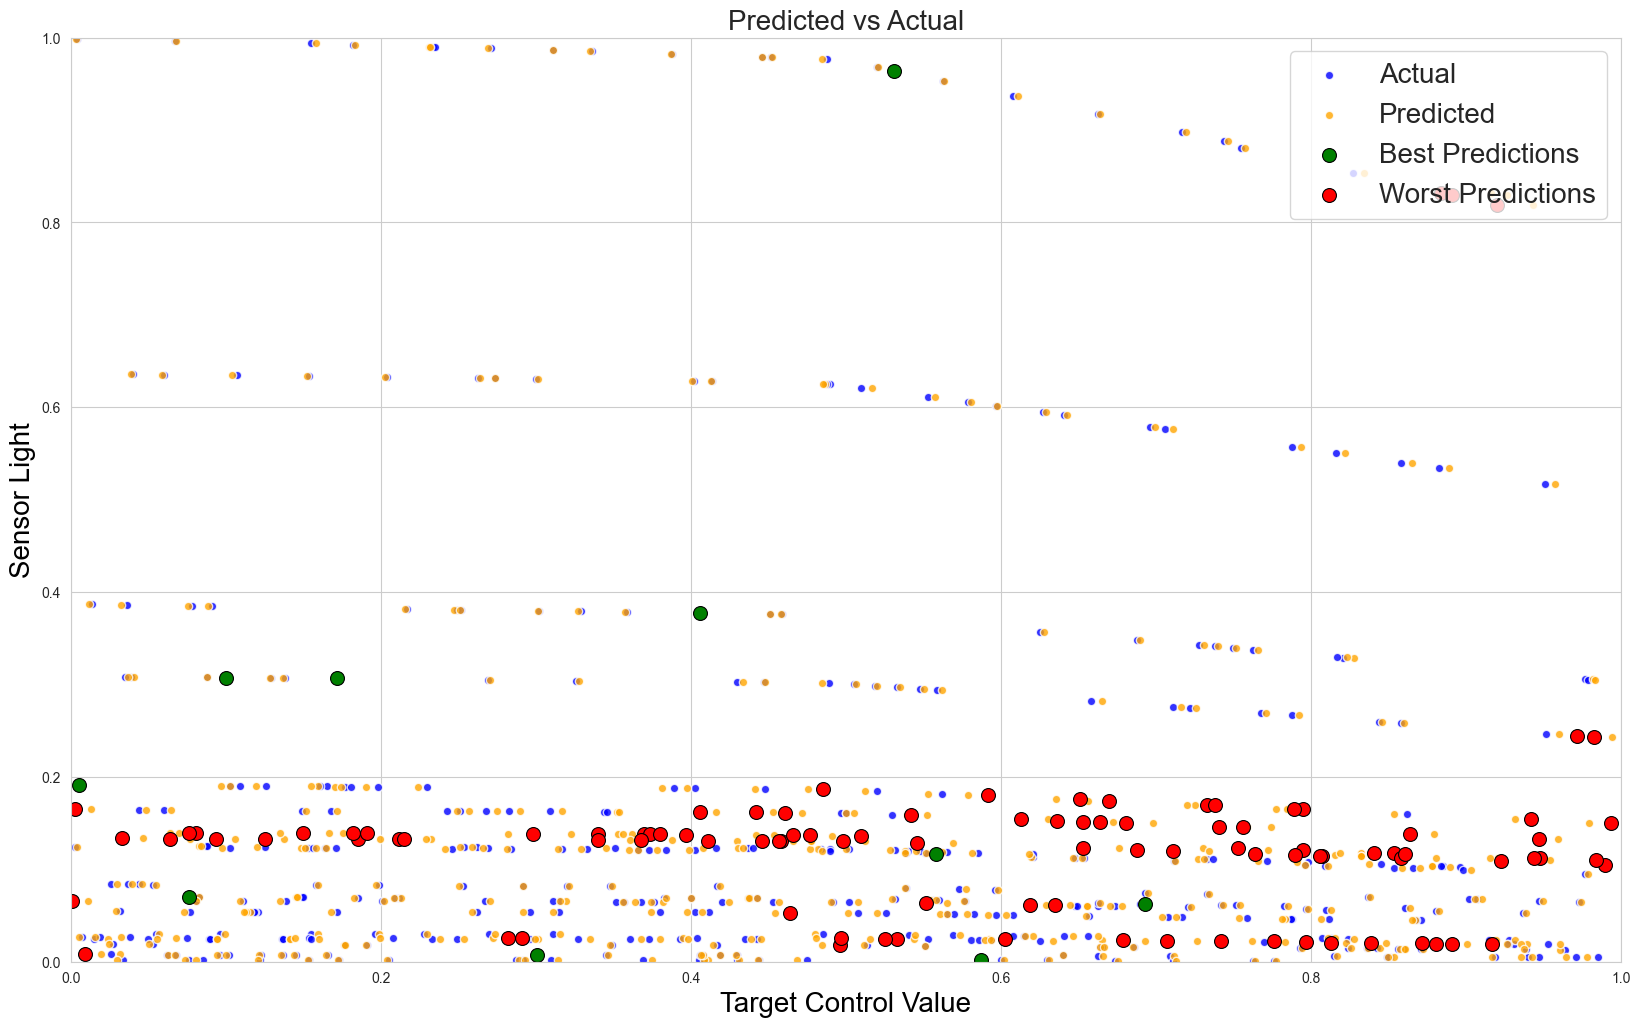

In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


MODEL_PATH = os.path.join('MODEL', 'color_model_.keras')
SCALER_PATH = os.path.join('MODEL', 'color_scaler.pkl')
TEST_FILE = os.path.join('dataset_020', 'color_dataset_concat.csv')

scaler = joblib.load(SCALER_PATH)
model = tf.keras.models.load_model(MODEL_PATH)

df = pd.read_csv(TEST_FILE)

df = df.sample(n=500)

start_index = 6000
#df = df.iloc[start_index:start_index + 1500]


#X_val = df.iloc[:, [2, 3, 4, 5]]
#y_val = df.iloc[:, 1]

X_val = df[['R', 'G', 'B', 'W']]
y_val = df['control_value']


X_val_scaled = scaler.transform(X_val)
y_val_pred = model.predict(X_val_scaled)


# Reset the index of y_test to allow direct indexing after the train-test split
y_val = y_val.reset_index(drop=True)


# Calculate prediction errors
errors = y_val_pred.flatten() - y_val

# Get the indices of the best and worst predictions
best_pred_indices = np.argsort(np.abs(errors))[:10]  # Indices of the 10 best predictions
worst_pred_indices = np.argsort(np.abs(errors))[-100:]  # Indices of the 10 worst predictions



absolute_errors = np.abs(errors)

best_pred_errors = absolute_errors.iloc[best_pred_indices]
worst_pred_errors = absolute_errors.iloc[worst_pred_indices]

print("Best Prediction Errors:")
for i, index in enumerate(best_pred_indices):
    print(f"Index: {index}, Absolute Error: {best_pred_errors.iloc[i]}")

print("\nWorst Prediction Errors:")
for i, index in enumerate(worst_pred_indices):
    print(f"Index: {index}, Absolute Error: {worst_pred_errors.iloc[i]}")
    


# Adjust your slicing here, if necessary
slice_min = 0
slice_max = len(y_val)  
col_slice = 0  # The feature  to plot


sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.title("Predicted vs Actual", fontsize=20)

sns.scatterplot(x=y_val[slice_min:slice_max], y=X_val_scaled[slice_min:slice_max, col_slice], color="blue", label="Actual", linewidth=1, alpha=0.8)
sns.scatterplot(x=y_val_pred.flatten()[slice_min:slice_max], y=X_val_scaled[slice_min:slice_max, col_slice], color="orange", label="Predicted", linewidth=1, alpha=0.8)

# Highlight the best predictions
sns.scatterplot(x=y_val[best_pred_indices], y=X_val_scaled[best_pred_indices, col_slice], color="green", label="Best Predictions", s=100, edgecolor='black')

# Highlight the worst predictions
sns.scatterplot(x=y_val[worst_pred_indices], y=X_val_scaled[worst_pred_indices, col_slice], color="red", label="Worst Predictions", s=100, edgecolor='black')


plt.xlabel('Target Control Value', color='black', fontsize=20)
plt.ylabel('Sensor Light', color='black', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
